#BOLLINGER BAND

The Bollinger band method is a popular technical analysis technique used to predict stock movements. It uses the concept of moving averages and standard deviation to create upper and lower bounds for stock prices, known as the Bollinger bands. When the stock price touches or exceeds the upper or lower bounds, it is seen as a potential buy or sell signal, respectively.

Importing the necessary libraries for handling data, calculating statistics, and plotting the results.

Data : https://drive.google.com/file/d/1b5O4Yk_wLAKb3z2d10RQIq93EQblS5cK/view?usp=sharing

In [8]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc

In [2]:
# Load the stock data
data = pd.read_csv("/content/reliance historical.csv")

In [3]:
data.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty'],
      dtype='object')

In [4]:
# Calculate the moving average and standard deviation
# using the pandas rolling function
ma = data["Close Price"].rolling(window=20).mean()
std = data["Close Price"].rolling(window=20).std()
#Use the rolling function from pandas to calculate the moving average and standard deviation of the stock data over a window of 20 days.

In [5]:
# Calculate the upper and lower bounds
upper_bound = ma + 2 * std
lower_bound = ma - 2 * std
#Calculate the upper and lower bounds of the Bollinger bands using the moving average and standard deviation. The upper bound is typically set to the moving average plus two standard deviations, and the lower bound is the moving average minus two standard deviations.


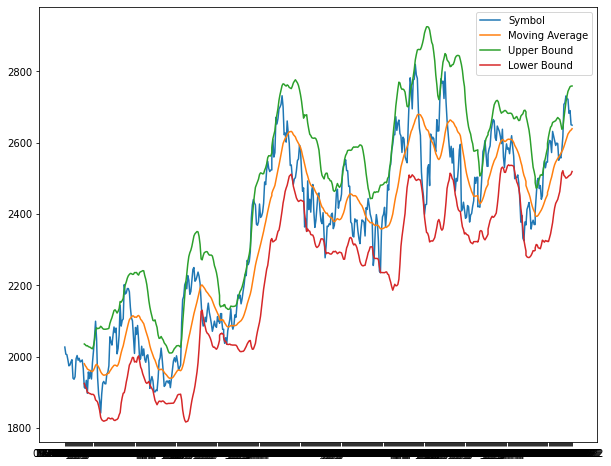

In [6]:
# Set the size of the figure to 10 inches by 8 inches
fig, ax = plt.subplots(figsize=(10, 8))
# Plot the stock data, moving average, and bounds
plt.plot(data["Date"], data["Close Price"], label="Symbol")
plt.plot(data["Date"], ma, label="Moving Average")
plt.plot(data["Date"], upper_bound, label="Upper Bound")
plt.plot(data["Date"], lower_bound, label="Lower Bound")

# Add a legend and show the plot
plt.legend()
plt.show()


 When the stock price touches or exceeds the upper or lower bounds, it is a potential buy or sell signal. We can use this information to make more informed trading decisions.

In [7]:
data.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty'],
      dtype='object')

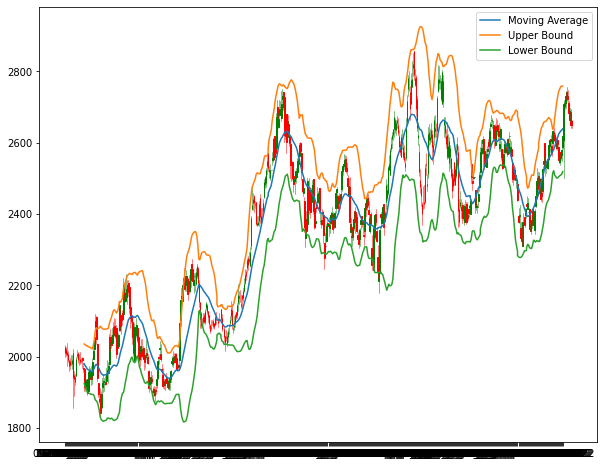

In [11]:
# Convert the stock data to a format suitable for
# candlestick_ohlc
data_ohlc = data[["Date", "Open Price", "High Price", "Low Price", "Close Price"]]
data_ohlc = data_ohlc.reset_index()
data_ohlc["Date"] = pd.to_datetime(data_ohlc["Date"])
data_ohlc = data_ohlc.set_index("Date")

# Plot the stock data as a candlestick chart
# Set the size of the figure to 10 inches by 8 inches
fig, ax = plt.subplots(figsize=(10, 8))
candlestick_ohlc(ax, data_ohlc.values, width=0.6, colorup="green", colordown="red")

# Plot the moving average and bounds
ax.plot(data["Date"], ma, label="Moving Average")
ax.plot(data["Date"], upper_bound, label="Upper Bound")
ax.plot(data["Date"], lower_bound, label="Lower Bound")

# Add a legend and show the plot
ax.legend()
plt.show()


In [12]:
# Save the chart as a PNG image file
plt.savefig("stock_chart.png")

<Figure size 432x288 with 0 Axes>

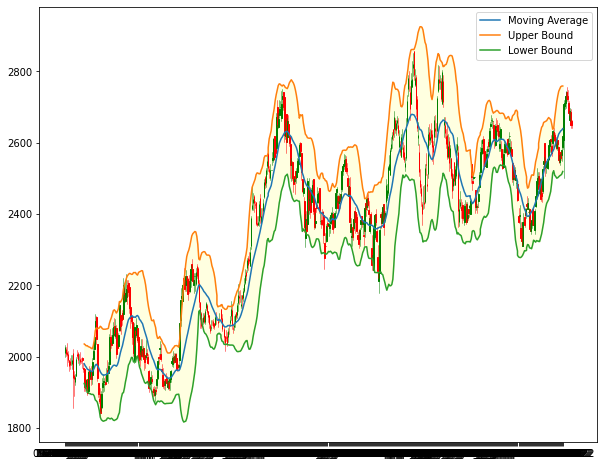

In [13]:
# Plot the stock data as a candlestick chart
# Set the size of the figure to 10 inches by 8 inches
fig, ax = plt.subplots(figsize=(10, 8))
candlestick_ohlc(ax, data_ohlc.values, width=0.6, colorup="green", colordown="red")

# Plot the moving average and bounds
ax.plot(data["Date"], ma, label="Moving Average")
ax.plot(data["Date"], upper_bound, label="Upper Bound")
ax.plot(data["Date"], lower_bound, label="Lower Bound")

# Shade the area between the upper and lower bounds
ax.fill_between(data["Date"], upper_bound, lower_bound, color="lightyellow")

# Add a legend and show the plot
ax.legend()

